<a href="https://colab.research.google.com/github/vlasova-us/Python_public/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%22%D0%94%D0%B8%D1%81%D0%BF%D0%B5%D1%80%D1%81%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B8_%D0%B2%D0%B8%D0%B4%D1%8B_%D0%BE%D1%88%D0%B8%D0%B1%D0%BE%D0%BA_%D0%90_%D0%92_%D1%82%D0%B5%D1%81%D1%82%D1%8B%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Задание № 1
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# H0 - выборки не имеют стат. значимых различий
# H1 - выборки имеют стат. значимые различия

stat, p = stats.ttest_ind(A, B, equal_var = True)
print(f"Статистика = {stat:.3f}, p = {p:.4f}")

if p > 0.05:
    print("Не отклоняем нулевую гипотезу. Результаты группы А не отличаются от результатов группы В")
else:
    print("Отклоняем нулевую гипотезу. Группы А и В имеют стат.значимые различия")

#  Объединение в один df
df_A = pd.DataFrame(A, columns =['A'])
df_B = pd.DataFrame(B, columns =['B'])
group_AB =pd.concat ([df_A, df_B], sort=False, axis=1)

Статистика = -1.734, p = 0.0845
Не отклоняем нулевую гипотезу. Результаты группы А не отличаются от результатов группы В


<Axes: >

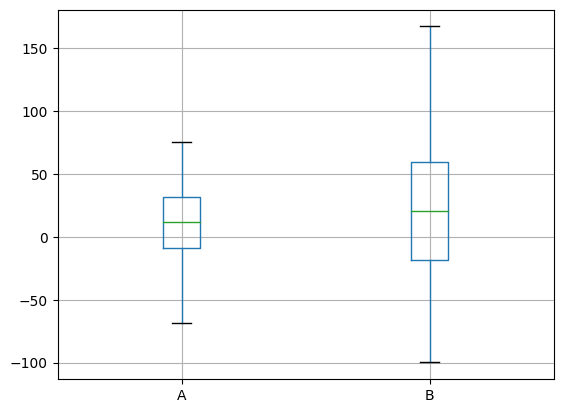

In [ ]:
#Строим boxplot для двух групп
group_AB.boxplot()


##### Задание № 2
Допустим, вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы — водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`

<Axes: >

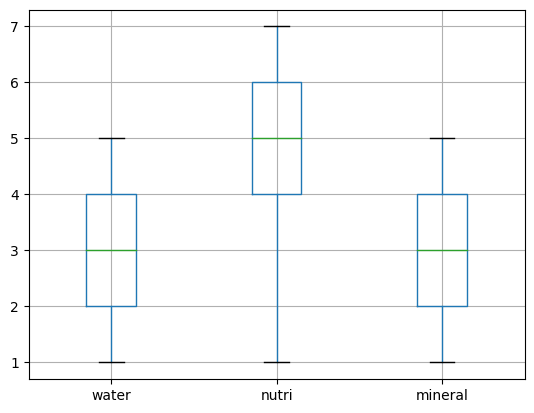

In [ ]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

#  Объединение в один df
df_water = pd.DataFrame(water, columns =['water'])
df_nutri = pd.DataFrame(nutri, columns =['nutri'])
df_mineral = pd.DataFrame(mineral, columns =['mineral'])
group_all =pd.concat ([df_water, df_nutri, df_mineral], sort=False, axis=1)

#Строим boxplot 
group_all.boxplot()


In [ ]:
# Тест Краскела-Уоллиса
# H0: Все распределения одинаковы.
# H1: Одно или несколько распределений различаются.
stat, p = stats.kruskal(water, nutri, mineral)

print(f"Статистика = {stat:.3f}, p = {p:.3f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 17.607, p = 0.000
Отклоняем нулевую гипотезу, распределения, вероятно, различаются


In [ ]:
# t-test
# H0 - выборки не имеют стат. значимых различий
# H1 - выборки имеют стат. значимые различия

stat, p = stats.ttest_ind(nutri, mineral, equal_var = True)
print(f"Статистика = {stat:.3f}, p = {p:.4f}")

if p > 0.05:
    print("Не отклоняем нулевую гипотезу. Результаты группы, где использовали полив минералкой, не отличаются от результатов группы с использованием удобрений")
else:
    print("Отклоняем нулевую гипотезу. Группы, где использовали полив минералкой, и результаты группы с использованием удобрений имеют стат.значимые различия")


Статистика = 4.258, p = 0.0001
Отклоняем нулевую гипотезу. Группы, где использовали полив минералкой, и результаты группы с использованием удобрений имеют стат.значимые различия


Блок 2
#### Cookie Cats

Cookie Cats — чрезвычайно популярная мобильная игра, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки.

По мере прохождения уровней игроки время от времени сталкиваются с воротами, которые заставляют их ждать или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота дают игрокам вынужденный перерыв в игре, что, как мы надеемся, приведёт к увеличению времени, проведённому в игре, и продлению удовольствия от игры.

<b>Но где ставить ворота? </b>
Изначально первые ворота были размещены на уровне `30`. В этом проекте вам предлагается проанализировать A/B-тест, в котором создатели переместили первые ворота в Cookie Cats с `30` уровня на уровень `40`. В частности, вам надо рассмотреть влияние A/B-теста на удержание игроков.

In [ ]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.head()

<ipython-input-4-e392f90565af>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения A/B-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.
* `version` - был ли игрок помещён в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).
* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - игрок вернулся и поиграл через 1 день после установки?
* `retention_7` - игрок вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

#### Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот.
    
**Замечание:** приведённых вспомогательных фрагментов кода не хватает для ответа на вопрос. 

Делать выводы необходимо, опираясь на статистические тесты, разобранные в лекции. 

Большим плюсом будет построение визуализиции для подтверждения ваших выводов. Рекомендуем использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и `matplotlib`

In [ ]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


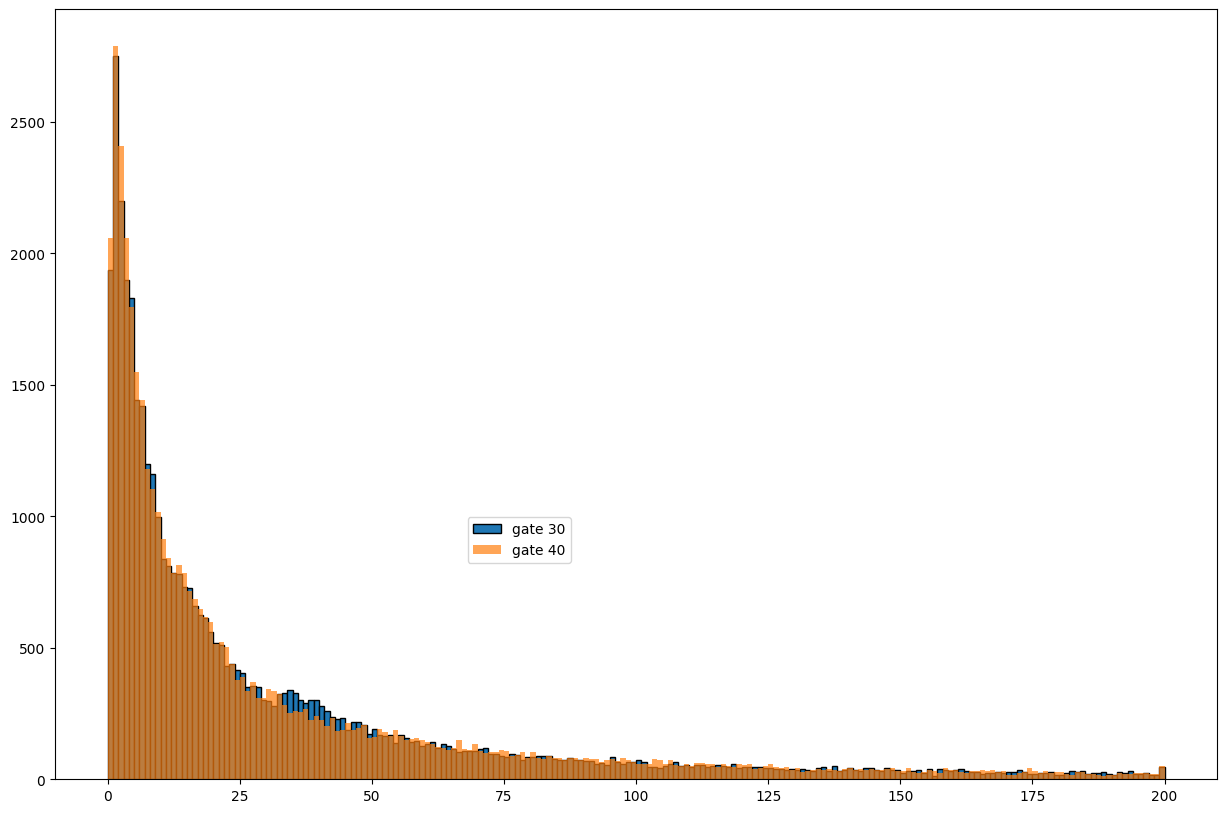

In [ ]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1, edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

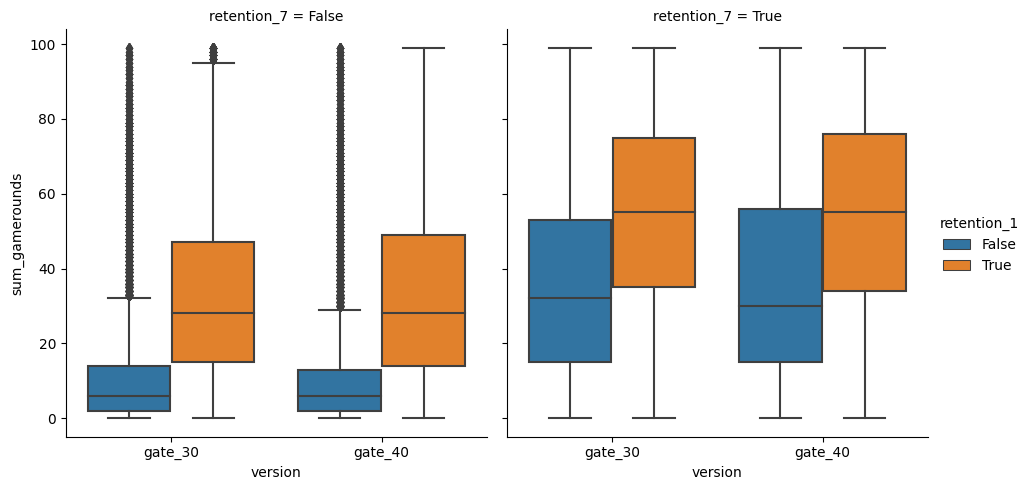

In [ ]:
df = data.loc[data['sum_gamerounds'] < 100].copy();


sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);

In [ ]:
from scipy.stats import f_oneway
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

stat, p = mannwhitneyu(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])

print('Статистика=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика=1024331250.500, p=0.050
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


<Axes: ylabel='Density'>

<Figure size 1500x1000 with 0 Axes>

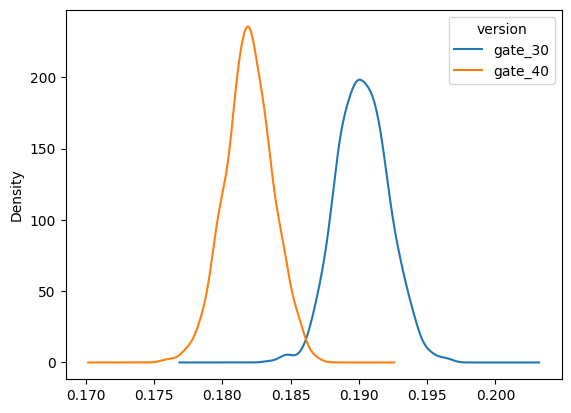

In [ ]:
plt.figure(figsize=(15, 10))
# boot_1d - собираем статистику по средним
boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac=1, replace=True).groupby(
        'version')['retention_7'].mean()  # retention_1
    boot_1d.append(boot_mean)

# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)

# График полученного распределения
boot_1d.plot(kind='density')

In [ ]:
# F-тест
def f_test(group1, group2):
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = group1.size-1
    dun = group2.size-1
    p_value = 1-stats.f.cdf(f, nun, dun)
    return f, p_value

stat, p = f_test(boot_1d['gate_30'], boot_1d['gate_40'])

print('Статистика=%.3f, p=%.5f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, дисперссии, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, дисперссии, вероятно, различаются')

Статистика=1.029, p=0.32437
Не отклоняем нулевую гипотезу, дисперссии, вероятно, одинаковые


In [ ]:
# t-критерий Стьюдента
stat, p = stats.ttest_ind(boot_1d['gate_30'], boot_1d['gate_40'])
print('Статистика=%.3f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика=101.479, p=0.0000000000
Отклоняем нулевую гипотезу, средние, вероятно, различаются


Выводы. По T-критерию значение p близко к нулю, поэтому отклоняем нулевую гипотезу о том, что средние значения двух выборок одинаковые. То есть существует статистически значимая разница между тем где поставить ворота

### Блок 3
#### Покемоны и A/B-тестирование
Покемоны — это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) и относятся к одному или двум так называемым классам (вода, огонь и т. д.).

Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

**Описание набора данных**
Профессор Оук скопировал всё содержимое в память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

**Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается, что они имеют одинаковую значимость.**

In [ ]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)
pokemon.head()

<ipython-input-3-79773de31e38>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


**Задание № 1**
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем покемоны в классе `rock`. Проверьте, прав ли он, и убедите его в своём выводе статистически.
    
Примечание: 
- покемоны, которые относятся к обоим классам, не должны входить в выборку;
- Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [ ]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pid        800 non-null    int64 
 1   Name       799 non-null    object
 2   Class 1    800 non-null    object
 3   Class 2    414 non-null    object
 4   HP         800 non-null    int64 
 5   Attack     800 non-null    int64 
 6   Defense    800 non-null    int64 
 7   Sp. Atk    800 non-null    int64 
 8   Sp. Def    800 non-null    int64 
 9   Speed      800 non-null    int64 
 10  Legendary  800 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 63.4+ KB


In [ ]:
# Фильтр по покемонам Grass и Rock
pokemon_1 = pokemon.loc[(pokemon['Class 1'] == 'Grass') | (pokemon['Class 1'] == 'Rock')| (pokemon['Class 2'] == 'Grass') | (pokemon['Class 2'] == 'Rock')]
pokemon_1

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
48,49,Oddish,Grass,Poison,45,50,55,75,65,30,False
...,...,...,...,...,...,...,...,...,...,...,...
785,786,Gourgeist Small Size,Ghost,Grass,55,85,122,58,75,99,False
786,787,Gourgeist Large Size,Ghost,Grass,75,95,122,58,75,69,False
787,788,Gourgeist Super Size,Ghost,Grass,85,100,122,58,75,54,False
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True


In [ ]:
# Убираем покемонов у которых два класса (Grass и Rock одновременно)
pokemon_Grass = pokemon_1.loc[(pokemon_1['Class 1'] == 'Grass') | (pokemon_1['Class 2'] == 'Grass')]
pokemon_Grass = pokemon_Grass.loc[pokemon_Grass['Class 2'].str.contains('Rock')== False]
pokemon_Grass

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
48,49,Oddish,Grass,Poison,45,50,55,75,65,30,False
...,...,...,...,...,...,...,...,...,...,...,...
783,784,Pumpkaboo Super Size,Ghost,Grass,59,66,70,44,55,41,False
784,785,Gourgeist Average Size,Ghost,Grass,65,90,122,58,75,84,False
785,786,Gourgeist Small Size,Ghost,Grass,55,85,122,58,75,99,False
786,787,Gourgeist Large Size,Ghost,Grass,75,95,122,58,75,69,False


In [ ]:
pokemon_Rock = pokemon_1.loc[(pokemon_1['Class 1'] == 'Rock') | (pokemon_1['Class 2'] == 'Rock')]
pokemon_Rock = pokemon_Rock.loc[pokemon_Rock['Class 2'].str.contains('Grass')== False]
pokemon_Rock

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
80,81,Geodude,Rock,Ground,40,80,100,30,30,20,False
81,82,Graveler,Rock,Ground,55,95,115,45,45,35,False
82,83,Golem,Rock,Ground,80,120,130,55,65,45,False
103,104,Onix,Rock,Ground,35,45,160,30,45,70,False
119,120,Rhyhorn,Ground,Rock,80,85,95,30,30,25,False
120,121,Rhydon,Ground,Rock,105,130,120,45,45,40,False
149,150,Omanyte,Rock,Water,35,40,100,90,55,35,False
150,151,Omastar,Rock,Water,70,60,125,115,70,55,False
151,152,Kabuto,Rock,Water,30,80,90,55,45,55,False
152,153,Kabutops,Rock,Water,60,115,105,65,70,80,False


In [ ]:
# Средняя сила атаки для покемонов класса Grass и Rock
print("Средняя сила атаки для покемонов класса Rock: ", pokemon_Rock['Attack'].mean())
print("Средняя сила атаки для покемонов класса Grass: ", pokemon_Grass['Attack'].mean())


Средняя сила атаки для покемонов класса Rock:  89.57446808510639
Средняя сила атаки для покемонов класса Grass:  75.93548387096774


In [ ]:
# t-Стьюдента
import scipy.stats as st
from scipy import stats
stat, p = st.ttest_1samp(a = pokemon_Grass['Attack'], popmean = pokemon_Rock['Attack'].mean())
print(f'Stat ={stat:.3f}, p = {p:.6f}')
# if p > 0.05:
#   print('Мощность атаки покемонов Grass, вероятно, такая же как у покемонов Rock')
# else:
#   print('Мощность атаки покемонов Grass, вероятно, отличается от мощности атаки покемонов Rock')  
if p>0.05 and pokemon_Grass['Attack'].mean() > pokemon_Rock['Attack'].mean():
  print ('Да, более сильную аттаку имеют покемоны Grass, чем покемоны Rock')
else:
    print ('Нет, более сильную аттаку имеют покемоны Rock, чем покемоны Grass')


Stat =-4.309, p = 0.000061
Нет, более сильную аттаку имеют покемоны Rock, чем покемоны Grass


**Задание № 2**
    
Профессор Оук уже долго не может спать по ночам, ведь его волнует вопрос: а правда ли, что покемоны в классе `Water` в среднем быстрее покемонов в классе `Normal`. 

Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: 
- покемоны, которые относятся к обоим классам, не должны входить в выборку;
- Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [ ]:
# Фильтруем покемонов Water и Normal
pokemon_2 = pokemon.loc[(pokemon['Class 1'] == 'Water') | (pokemon['Class 1'] == 'Normal') | (pokemon['Class 2'] == 'Water') | (pokemon['Class 2'] == 'Normal')]
pokemon_2

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,False
10,11,Wartortle,Water,NaN,59,63,80,65,80,58,False
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,False
12,13,Mega Blastoise,Water,NaN,79,103,120,135,115,78,False
20,21,Pidgey,Normal,Flying,40,45,40,35,35,56,False
...,...,...,...,...,...,...,...,...,...,...,...
762,763,Clauncher,Water,NaN,50,53,62,58,63,44,False
763,764,Clawitzer,Water,NaN,71,73,88,120,89,59,False
764,765,Helioptile,Electric,Normal,44,38,33,61,43,70,False
765,766,Heliolisk,Electric,Normal,62,55,52,109,94,109,False


In [ ]:
# Убираем покемонов с классами Water и Normal одновременно

pokemon_Water = pokemon_2.loc[(pokemon_2['Class 1'] == 'Water') | (pokemon_2['Class 2'] == 'Water')]
pokemon_Water = pokemon_Water.loc[pokemon_Water['Class 2'].str.contains('Normal')== False]
pokemon_Water

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
67,68,Poliwrath,Water,Fighting,90,95,95,70,90,70,False
78,79,Tentacool,Water,Poison,40,40,35,50,100,70,False
79,80,Tentacruel,Water,Poison,80,70,65,80,120,100,False
85,86,Slowpoke,Water,Psychic,90,65,65,40,40,15,False
86,87,Slowbro,Water,Psychic,95,75,110,100,80,30,False
...,...,...,...,...,...,...,...,...,...,...,...
726,727,Greninja,Water,Dark,72,95,67,103,71,122,False
758,759,Binacle,Rock,Water,42,52,67,39,56,50,False
759,760,Barbaracle,Rock,Water,72,105,115,54,86,68,False
760,761,Skrelp,Poison,Water,50,60,60,60,60,30,False


In [ ]:
pokemon_Normal = pokemon_2.loc[(pokemon_2['Class 1'] == 'Normal') | (pokemon_2['Class 2'] == 'Normal')]
pokemon_Normal = pokemon_Normal.loc[pokemon_Normal['Class 2'].str.contains('Water')== False]
pokemon_Normal

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
20,21,Pidgey,Normal,Flying,40,45,40,35,35,56,False
21,22,Pidgeotto,Normal,Flying,63,60,55,50,50,71,False
22,23,Pidgeot,Normal,Flying,83,80,75,70,70,101,False
23,24,Mega Pidgeot,Normal,Flying,83,80,80,135,80,121,False
26,27,Spearow,Normal,Flying,40,60,30,31,31,70,False
27,28,Fearow,Normal,Flying,65,90,65,61,61,100,False
44,45,Jigglypuff,Normal,Fairy,115,45,20,45,25,20,False
45,46,Wigglytuff,Normal,Fairy,140,70,45,85,50,45,False
90,91,Farfetch'd,Normal,Flying,52,65,55,58,62,60,False
91,92,Doduo,Normal,Flying,35,85,45,35,35,75,False


In [ ]:
# Рассчитаем среднюю скорость для покемонов 

print("Средняя скорость для покемонов Water: ", pokemon_Water['Speed'].mean())
print("Средняя скорость для покемонов Normal: ", pokemon_Normal['Speed'].mean())

Средняя скорость для покемонов Water:  62.43283582089552
Средняя скорость для покемонов Normal:  76.525


In [ ]:
# t -тест Стьюдента

stat, p = st.ttest_1samp(a = pokemon_Water['Speed'], popmean = pokemon_Normal['Speed'].mean())
print(f'Stat ={stat:.3f}, p = {p:.6f}')
# if p > 0.05:
#   print('Скорость покемонов Water, вероятно, такая же как у покемонов Normal')
# else:
#   print('Скорость покемонов Water, вероятно, отличается от скорости покемонов Normal') 
if p > 0.05 and pokemon_Water['Speed'].mean() > pokemon_Normal['Speed'].mean():
  print('Да, покемоны класса Water в среднем быстрее, чем покемоны класса Normal')
else:
  print('Нет, покемоны класса Water в среднем не быстрее, чем покемоны класса Normal')


Stat =-4.672, p = 0.000015
Нет, покемоны класса Water в среднем не быстрее, чем покемоны класса Normal


**Задание № 3:**
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. 
Однако мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку некоторым покемонам (массив `treathed_pokemon`). 
Проверьте, работает ли вообще его сыворотка, и убедите всех в своем выводе статистически.
    
    
*Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.*

In [ ]:
# Покемоны, которые принимали сыворотку
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']
pokemon_3 = pokemon.loc[(pokemon['Name'] == 'Mega Beedrill') | (pokemon['Name'] == 'Mega Alakazam') | (pokemon['Name'] == 'Deoxys Normal Forme')| (pokemon['Name'] == 'Mega Lopunny')]
pokemon_3

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False


In [ ]:
# Средняя скорость покемонов
# покемоны, которые не принимали сыворотку
pokemon_not_treathed = pokemon.loc[(pokemon['Name'].str.contains('Mega Beedrill')== False) & (pokemon['Name'].str.contains('Mega Alakazam')== False) & (pokemon['Name'].str.contains('Deoxys Normal Forme')== False) & (pokemon['Name'].str.contains('Mega Lopunny')== False)]

print ("Средняя скорость покемонов, принявших сыворотку: " , pokemon_3['Speed'].mean())
print ("Средняя скорость покемонов, НЕ принявших сыворотку: " , pokemon_not_treathed['Speed'].mean())


Средняя скорость покемонов, принявших сыворотку:  145.0
Средняя скорость покемонов, НЕ принявших сыворотку:  67.85786163522013


In [ ]:
# t -тест Стьюдента.

stat, p = st.ttest_1samp(a = pokemon_3['Speed'], popmean = pokemon_not_treathed['Speed'].mean())
print(f'Stat ={stat:.3f}, p = {p:.6f}')
# if p > 0.05:
#   print('Скорость покемонов, принявших сыворотку, вероятно, такая же как у покемонов ее не пивших')
# else:
#   print('Скорость покемонов, принявших сыворотку, вероятно, отличается от скорости покемонов ее не пивших') 
if p < 0.05 and pokemon_3['Speed'].mean() > pokemon_not_treathed['Speed'].mean():
  print ('Скорость покемонов, принявших сыворотку больше, чем у покемонов ее не пивших')
else:
  print ('Скорость покемонов, принявших сыворотку не отличается от скорости покемонов, кто не пил сыворотку')

Stat =21.819, p = 0.000211
Скорость покемонов, принявших сыворотку больше, чем у покемонов ее не пивших


**Задание № 4**
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако профессор не очень уверен, что они лучше остальных покемонов. 
Оук предложил разобраться в этом Вам. 

Действительно ли сумма характеристик `HP`, `Attack`, `Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров? 

Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.

*Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.*

In [ ]:
# Фильтрация групп 

# Фильтр по легендарным покемоннам
pokemon_legend = pokemon.loc[pokemon['Legendary'] == True]

# Фильтр на всех остальных покемонов
pokemon_4 = pokemon.loc[pokemon['Legendary'] == False]

In [ ]:
# Сумма средних характеристик покемонов

characteristic_ordinary_pokemons = pokemon_4['HP'].mean() + pokemon_4['Attack'].mean() + pokemon_4['Defense'].mean()
characteristic_legend_pokemons = pokemon_legend['HP'].mean() + pokemon_legend['Attack'].mean() + pokemon_legend['Defense'].mean()
print ("Сумма средних характеристик обычных покемонов: ", characteristic_ordinary_pokemons)
print ("Сумма средних характеристик Легендарных покемонов: ", characteristic_legend_pokemons)

Сумма средних характеристик обычных покемонов:  214.4108843537415
Сумма средних характеристик Легендарных покемонов:  309.07692307692304


In [ ]:
# t-test
stat, p = st.ttest_1samp(a = (pokemon_legend['HP'] + pokemon_legend['Attack'] + pokemon_legend['Defense']), popmean = characteristic_ordinary_pokemons)
print(f'Stat ={stat:.3f}, p = {p:.6f}')
if p > 0.05:
  print('Легендарные покемоны в среднем, вероятно, не сильнее обычных')
else:
  print('Легендарные покемоны в среднем, вероятно, сильнее обычных') 

Stat =16.438, p = 0.000000
Легендарные покемоны в среднем, вероятно, сильнее обычных


In [ ]:
# произведения средних характеристик

characteristic_ordinary_pokemons_2 = pokemon_4['HP'].mean() * pokemon_4['Attack'].mean() * pokemon_4['Defense'].mean()
characteristic_legend_pokemons_2 = pokemon_legend['HP'].mean() * pokemon_legend['Attack'].mean() * pokemon_legend['Defense'].mean()
print ("Произведение средних характеристик обычных покемонов: ", characteristic_ordinary_pokemons_2)
print ("Произведение средних характеристик Легендарных покемонов: ", characteristic_legend_pokemons_2)

Произведение средних характеристик обычных покемонов:  363781.449577234
Произведение средних характеристик Легендарных покемонов:  1078381.5321110606


In [ ]:
# t-test
stat, p = st.ttest_1samp(a = (pokemon_legend['HP'] * pokemon_legend['Attack'] * pokemon_legend['Defense']), popmean = characteristic_ordinary_pokemons_2)
print(f'Stat ={stat:.3f}, p = {p:.3f}')
if p > 0.05:
  print('Легендарные покемоны в среднем, вероятно, не сильнее обычных')
else:
  print('Легендарные покемоны в среднем, вероятно, сильнее обычных') 

Stat =11.262, p = 0.000
Легендарные покемоны в среднем, вероятно, сильнее обычных


**Задание № 5**
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса (массив `best_defence_class`), которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. 

Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо. Все та же статистика Вам в помощь! 

*Вы можете предположить, что распределение сумм и произведений этих параметров является нормальным для всех классов покемонов.*

In [ ]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']
pokemon_rock = pokemon.loc[(pokemon['Class 1'] == 'Rock') | (pokemon['Class 2'] == 'Rock')]
pokemon_ground = pokemon.loc[(pokemon['Class 1'] == 'Ground') | (pokemon['Class 2'] == 'Ground')]
pokemon_steel = pokemon.loc[(pokemon['Class 1'] == 'Steel') | (pokemon['Class 2'] == 'Steel')]
pokemon_ice = pokemon.loc[(pokemon['Class 1'] == 'Ice') | (pokemon['Class 2'] == 'Ice')]


In [ ]:
pokemon_5 = pokemon[pokemon['Class 1'].isin(best_defence_class)]
pokemon_5 = pokemon_5[pokemon_5['Class 2'].isin(best_defence_class)]
pokemon_5.head()


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
80,81,Geodude,Rock,Ground,40,80,100,30,30,20,False
81,82,Graveler,Rock,Ground,55,95,115,45,45,35,False
82,83,Golem,Rock,Ground,80,120,130,55,65,45,False
103,104,Onix,Rock,Ground,35,45,160,30,45,70,False
119,120,Rhyhorn,Ground,Rock,80,85,95,30,30,25,False


In [ ]:
# Общая средняя
grand_mean = pokemon_5['Defense'].values.flatten().mean()
grand_mean

114.47826086956522

In [ ]:
# Общая сумма квадратов sst = ssb + ssw
sst = sum((val - grand_mean)**2 for val in pokemon_5['Defense'].values.flatten())
sst

55785.739130434784

In [ ]:
# Отклонение групповых средний от общей средней
ssb = sum(pokemon_5[group].size * (group_mean - grand_mean) ** 2 for group, group_mean in pokemon_5.mean().items())
ssb

<ipython-input-27-b4c64f51105b>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  ssb = sum(pokemon_5[group].size * (group_mean - grand_mean) ** 2 for group, group_mean in pokemon_5.mean().items())


1715059.8260869563

In [ ]:
# Отклонения значений внутри группы от средней группы
ssw = sum(sum((x - group_mean)**2 for x in pokemon_5[group]) for group, group_mean in pokemon_5.mean().items())
ssw

<ipython-input-28-644cc80652b4>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  ssw = sum(sum((x - group_mean)**2 for x in pokemon_5[group]) for group, group_mean in pokemon_5.mean().items())


1093956.086956522

In [ ]:
groups = pokemon_5.shape[1]
# Степени свободы
dfb = groups - 1
dfw = pokemon_5.size - groups
# Межгрупповой средний квадрат
mssb = ssb/dfb
# Внутригрупповой средний квадрат
mssw = ssw/dfw

In [ ]:
f_value = mssb/mssw

p = st.f.sf(f_value, dfb, dfw)
print('Результат:')
if p < 0.05:
    print('Аттака покемонов, входящих в best defese class, в среднем, вероятно, отличаются между собой')
else:
    print('Аттака покемонов, входящих в best defese class, не отличаются между собой')
print(f"Полученное f-значение {f_value}")

Результат:
Аттака покемонов, входящих в best defese class, в среднем, вероятно, отличаются между собой
Полученное f-значение 37.93977499295535
